In [1]:
import sys
sys.path.append('..')
import sponge_networks as sn
import numpy as np
import networkx as nx
import pandas as pd
import ipywidgets

In [2]:
%%HTML
<style>
.jp-RenderedSVG{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>

## Ресурсная сеть:

- Представляет собой нелинейную модель потока, работающую в дискретном времени
- Вершины сети синхронно перераспределяют некоторый бесконечно делимый ресурс.
- На каждом временном шаге каждая вершина отправляет ресурс всем своим соседям по одному из двух правил с пороговым переключением.
- Выбор правила зависит от количества ресурса в вершине;
  - Если ресурс в вершине больше, чем общая пропускная способность ее исходящих ребер, он отправляет полную пропускную способность каждому ребру;
  - В противном случае вершина отдает весь ресурс, распределяя его пропорционально пропускной способности исходящих ребер;
- Вершины имеют неограниченные емкости.

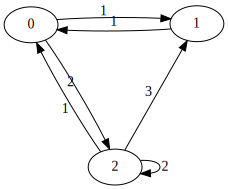

In [3]:
R = np.array([
        [0, 1, 2],
        [1, 0, 0],
        [1, 3, 2]
    ])
simple_graph = nx.from_numpy_array(R, create_using=nx.DiGraph)
rn1 = sn.ResourceNetwork(simple_graph)
rn1.plot(scale=1.2)

- Ресурсы $q_i(t)$ -- неотрицательные числа, присвоенные вершинам $v_i, i = \overline{1,n}$, и изменяющиеся в дискретном времени t.
- Состояние $Q(t)$ c на временном шаге t представляет собой вектор значений ресурсов в каждой вершине:
$$Q(t)=(q_1(t),…,q_n(t)).$$


### Правило функционирования модели:

- На временном шаге t вершина $v_i$ отправляет соседней вершине $v_j$ через ребро $e_{ij}$ количество ресурса $f_{ij}(t)$, равное:
    $$f_{ij}(t)=\left\{
        \begin{array}{ccl}
            r_{ij}, & q_i(t) \geq r^{out}_{i} & -\text{ правило 1} \\
            \frac{r_{ij}}{r^{out}_{i}} q_i(t), & q_i(t) < r^{out}_{i} & -\text{ правило 2} \\
        \end{array}
    \right.$$
- В таком случае, вершина $v_i$ в момент времени $t+1$ получает ресурса:
    $$\sum\limits_{j = 1}^n f_{ij}(t) = q_i(t+1)$$

In [4]:
sim1 = rn1.run_simulation([0, 0, 4])
d1 = rn1.plot_simulation(sim1, scale=1.4)
d1

interactive(children=(IntSlider(value=0, description='№ of iteration', max=29), Output(layout=Layout(height='3…

## Ресурсные сети с "жадными" вершинами
- Вершина $v_i$, имеющая петлю, на такте t отдает:
  - $r_{ii}$ ресурса в петлю, если $q_i(t) > r_{ii}$, и оставшийся ресурс $\Delta q_i(t) = q_i(t) - r_{ii}$  распределяет в исходящие ребра по правилам стандартной ресурсной сети;
  -  $q_i(t)$ ресурса в петлю, если $q_i(t) \leq r_{ii}$ (весь имеющийся ресурс уходит в петлю).

In [5]:
rn2 = sn.ResourceNetworkGreedy(rn1.G)
sim2 = rn2.run_simulation([0, 0, 4])
d2 = rn2.plot_simulation(sim2, scale=1.4)
ipywidgets.HBox([d1, d2])

## Губковые сети

<table align="left"; style="font-size:110%">
    <tr>
        <td>

- Основа: ресурсные сети с "жадными" вершинами;
- Регулярный планарный граф (замощение плоскости):
  - квадратная сеть
  - треугольная сеть
  - шестиугольная сеть
  - возможно что-то другое, не обязательно регулярное?
- В $t = 0$ ресурс лежит в верхних вершинах;
- Наличие стоковых вершин.
  - опционально
        </td>
        <td>
            <img src="assets/spongebob.png">
        </td>
    </tr>
</table>

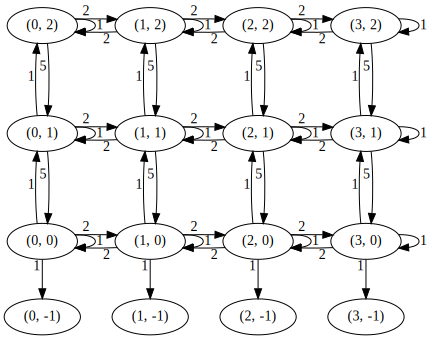

In [6]:
# "triangular", "hexagonal", "grid_2d"
nw1 = sn.build_sponge_network(
    grid_type="grid_2d", n_cols=3, n_rows=2,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 2,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": True,
    },
    visual_sink_edge_length=0.7
)

nw1.resource_network.plot(scale=1.5)

In [7]:
# "triangular", "hexagonal", "grid_2d"
nw2 = sn.build_sponge_network(
    grid_type="triangular", n_cols=3, n_rows=2,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 2,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": True,
    },
    visual_sink_edge_length=0.7
)
nw2.plot_simulation(nw2.run_sponge_simulation([4, 0, 8], n_iters=100), scale=1.2)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=99), Output(layout=Layout(height='3…

### Задаваемые параметры

- Количество строк и столбцов
- Веса ребер: петли, горизонтальные, вверх, вниз
- Создавать ли стоковые вершины?
- Веса ребер стоковых вершин

In [8]:
# "triangular", "hexagonal", "grid_2d"
nw3 = sn.build_sponge_network(
    grid_type="triangular", n_cols=8, n_rows=4,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 2,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": False,
    },
    visual_sink_edge_length=0.7
)
nw3.plot_simulation(nw3.run_sponge_simulation([4, 0, 20, 0, 0], n_iters=100), scale=1.)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=99), Output(layout=Layout(height='3…

- Представление о сети как о модели перколяции

### Пример шестиугольной сети

In [16]:
# "triangular", "hexagonal", "grid_2d"
nw4 = sn.build_sponge_network(
    grid_type="hexagonal", n_cols=3, n_rows=2,
    layout={
        "weights_sink_edge": 2,
        "weights_loop": 1.5,
        "weights_horizontal": 2,
        "weights_up_down": 2,
        "weights_down_up": 2,
        "generate_sinks": True,
    },
    visual_sink_edge_length=0.7
)
nw4.plot_simulation(nw4.run_sponge_simulation([22, 0, ], n_iters=200), scale=1.)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=199), Output(layout=Layout(height='…

### Возникающие вопросы и возможные направления исследования

- В чем отличие от свойств обычной сети с "жадными" вершинами?
  - Нас интересует конечное время
  - Скорость достижения "остановки"
- Сколько ресурса успеет дотечь "до конца"? Зависимость от параметров?
- Исследование свойств движения "фронта" жидкости
  - Асимптотическое (относительно размера графа) поведение
- Свойства боковой анизотропии?

#### "Фронт"

In [10]:
# "triangular", "hexagonal", "grid_2d"
nw3 = sn.build_sponge_network(
    grid_type="triangular", n_cols=10, n_rows=4,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 2,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": True,
    },
    visual_sink_edge_length=0.7
)
nw3.plot_simulation(nw3.run_sponge_simulation([8]*6, n_iters=100), scale=1.)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=99), Output(layout=Layout(height='3…

#### Боковая анизотропия

In [17]:
def anisotropy(G: nx.DiGraph) -> None:
    for u, v, d in G.edges(data=True):
        (i1, j1), (i2, j2) = (u, v)
        if j1 == j2 and i1 + 1 == i2:
            d["weight"] *= 1.2
nw3_anisotropy = nw3.altered(anisotropy)
nw3_anisotropy.plot_simulation(nw3_anisotropy.run_sponge_simulation([15]*6, n_iters=50), scale=1.)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=49), Output(layout=Layout(height='3…

#### Возможные модификации

- Протекание не сразу в верхние вершины, а "капаем" постепенно
- Изменение правил работы сети
  - Динамическая пропускная способность ребер
- Бесконечный локально конечный планарный граф
  - Интересные свойства можно доказывать, пользуясь симметриями
    - Группа симметрий $G$ действует на его вершины транзитивно
- Изменение топологии
  - На цилиндре
  - На торе (!?)